In [21]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import csv

The following cell reads the csv files under the same directory. It stores the number of confirmed cases, deaths, and recovered cases in three 2D arrays. 

(One can also try pandas if preferred.)

In [22]:
confirmed = [] 
death = []
recovered = []
# reading csv file 
with open("confirmed_global.csv", 'r') as csvfile: 
    csvreader = csv.reader(csvfile) 
    for row in csvreader: 
        confirmed.append(row)
with open("deaths_global.csv",'r') as csvfile:
    csvreader = csv.reader(csvfile) 
    for row in csvreader: 
        death.append(row)
with open("recovered_global.csv",'r') as csvfile:
    csvreader = csv.reader(csvfile) 
    for row in csvreader: 
        recovered.append(row)
        
    
confirmed = np.asarray(confirmed)
death = np.asarray(death)
recovered = np.asarray(recovered)

The next cell generate a time series for a given province/state, or country/region. 

In the CSV files, the names of provinces/states are stored in the 0-th column, so one can find the row with 0-th element as the name of the state/province, e.g. 'Hubei' below. 

The names of countries/regions are stored in the 1-st column. For example, to get the time series of Italy, one can replace the lines with idx by:

idx = np.where(arrayname[:,1] == 'Italy').

The time series start from the 4-th column. 




In [ ]:
idx = np.where(confirmed[:,0] == 'Hubei') #
idx = idx[0]
confirmed = confirmed[idx, 4:np.shape(confirmed)[1]  ]

idx = np.where(death[:,0] == 'Hubei') #
idx = idx[0]
death = death[idx, 4:np.shape(death)[1]  ]

idx = np.where(recovered[:,0] == 'Hubei') #
idx = idx[0]
recovered = recovered[idx, 4:np.shape(recovered)[1]  ]

confirmed = confirmed[0].astype(np.float)
death = death[0].astype(np.float)
recovered = recovered[0].astype(np.float)

Some time series might begin with zero, which indicates there was no confirmed case on the first day of this record. After we find the date that the first case appears, we take it as the initial condition of I, and try to use SIR model to fit the time series after that. 

We can not keep the zeros at the beginning of the time series. In the SIR model, the derivative of the infectious population is given by:
$$
\frac{dI}{dt} = \frac{a}{N}SI - bI = ( \frac{a}{N} S - b) I.
$$
If $I(0)=0$, then the derivative will remain zero all the time, and then $I(t) \equiv 0 $ for any $t$.


In [23]:
# Look for the first day that confirmed cases appeared, and take it as the initial condition:
start = np.where(confirmed > 0)
# Current length of the time series:
T = np.shape(confirmed)[0]
# Remove the data before the first case in the time series, so it will have a nonzero initial condition:
confirmed = confirmed[start[0][0]:T]
death = death[ start[0][0]:T ]
recovered = recovered[ start[0][0]:T ]
# Current length of the time series:
T = T - start[0][0]

# The infectious population is then : #I = confirmed cases - (#deaths + #recovered)
I = confirmed - death - recovered
t = np.arange(T)

N = 58500000 # population of Hubei on wikipedia...

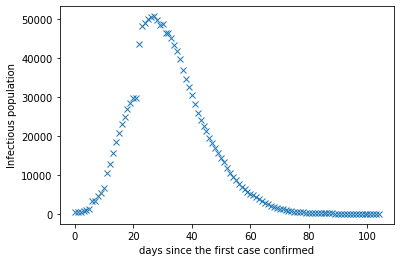

In [19]:
plt.plot(t,I,'x')
#plt.plot(t,death,'.',label = 'deaths')
#plt.plot(t,confirmed,'*',label = 'confirmed')
#plt.plot(t,recovered,'+',label = 'recovered')
plt.xlabel('days since the first case confirmed')
plt.ylabel('Infectious population')
plt.show()